<a href="https://colab.research.google.com/github/sinman96/Data-Science-Projects/blob/main/CornersChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [222]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from CornersChallengeFunctions import *

**bold text**

In [223]:
df_train = pd.read_csv('train.csv')

In [224]:
df_train.head()

,MatchId,LeagueId,Date,HomeTeamId,AwayTeamId,Home_Goals,Away_Goals,Home_Corners,Away_Corners
0,2826,793,02/04/2005,410,908,2.0,0.0,15,1
1,2827,793,02/04/2005,338,597,3.0,2.0,3,6
2,2828,793,02/04/2005,1364,246,2.0,3.0,13,2
3,2829,793,02/04/2005,1088,1397,1.0,0.0,2,5
4,2830,793,02/04/2005,830,1412,2.0,3.0,3,6


In [225]:
len(df_train)

23830

In [226]:
df_train.nunique()

MatchId         23830
LeagueId           13
Date             1348
HomeTeamId        332
AwayTeamId        333
Home_Goals         10
Away_Goals          9
Home_Corners       22
Away_Corners       20
dtype: int64

**From this, we can assume that MatchId is irrelevant to predicting corners.**

In [227]:
df_train['Home_Corners'].describe()

count    23830.000000
mean         5.726060
std          2.844714
min          0.000000
25%          4.000000
50%          5.000000
75%          7.000000
max         21.000000
Name: Home_Corners, dtype: float64

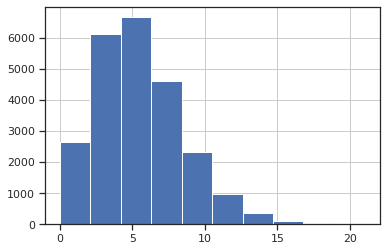

In [228]:
df_train['Home_Corners'].hist()

In [229]:
df_train['Away_Corners'].describe()

count    23830.000000
mean         4.493412
std          2.505376
min          0.000000
25%          3.000000
50%          4.000000
75%          6.000000
max         19.000000
Name: Away_Corners, dtype: float64

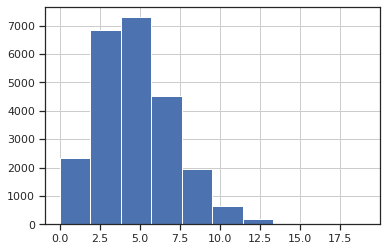

In [230]:
df_train['Away_Corners'].hist()

**Away and Home corners look normally distributed, let's examine if Total corners is to significance level alpha = 0.05**

In [231]:
df_train['Total_Corners'] = df_train['Home_Corners'] + df_train['Away_Corners']

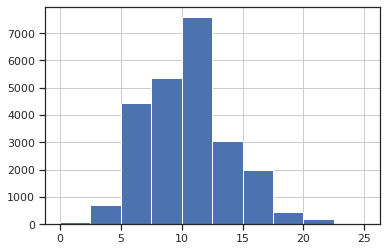

In [232]:
df_train['Total_Corners'].hist()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


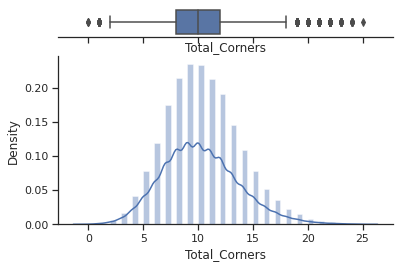

In [233]:
sns.set(style="ticks")

x = df_train['Total_Corners']

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(x, ax=ax_box)
sns.distplot(x, ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

**From the box plot and histogram we can assume Total_Corners is normally distributed**

In [181]:
y_train = df_train['Total_Corners'].values

In [182]:
df_train.head()

,MatchId,LeagueId,Date,HomeTeamId,AwayTeamId,Home_Goals,Away_Goals,Home_Corners,Away_Corners,Total_Corners
0,2826,793,02/04/2005,410,908,2.0,0.0,15,1,16
1,2827,793,02/04/2005,338,597,3.0,2.0,3,6,9
2,2828,793,02/04/2005,1364,246,2.0,3.0,13,2,15
3,2829,793,02/04/2005,1088,1397,1.0,0.0,2,5,7
4,2830,793,02/04/2005,830,1412,2.0,3.0,3,6,9


In [183]:
df_test = pd.read_csv('test.csv')

In [184]:
df_test.head()

,MatchId,LeagueId,Date,HomeTeamId,AwayTeamId,Line,Over,Under,Unnamed: 8,P(Under),P(At),P(Over),Bet (U/O),Stake
0,1,741,01/04/2011,342,694,9.5,1.790,1.80,NaN,NaN,NaN,NaN,NaN,NaN
1,2,741,01/04/2011,1424,270,11.5,1.920,2.00,NaN,NaN,NaN,NaN,NaN,NaN
2,3,729,01/04/2011,691,1137,10.5,1.970,1.87,NaN,NaN,NaN,NaN,NaN,NaN
3,4,729,01/04/2011,787,808,11.0,2.075,1.77,NaN,NaN,NaN,NaN,NaN,NaN
4,5,741,01/04/2011,784,1117,12.0,2.020,1.86,NaN,NaN,NaN,NaN,NaN,NaN


In [185]:
df_test.nunique()

MatchId       341
LeagueId        7
Date           31
HomeTeamId    129
AwayTeamId    134
Line            7
Over           75
Under          96
Unnamed: 8      0
P(Under)        0
P(At)           0
P(Over)         0
Bet (U/O)       0
Stake           0
dtype: int64

In [186]:
df_test = df_test.drop(['Unnamed: 8'], axis = 1)

**The test data set doesn't have goals, so I will not use them in the training predictions and also not use the dates**

In [187]:
X_train = df_train.drop(['Date'], axis = 1).iloc[:, 1:4].values

In [188]:
X_train

array([[ 793,  410,  908],
       [ 793,  338,  597],
       [ 793, 1364,  246],
       ...,
       [ 800, 4704, 4705],
       [ 800, 2113,  250],
       [ 800,  907, 1827]])

In [189]:
y_train = df_train['Total_Corners'].values

In [190]:
y_train

array([16,  9, 15, ...,  8, 10, 10])

In [191]:
X_test = df_test.drop(['Date'], axis = 1).iloc[:, 1:4].values

In [192]:
X_test

array([[ 741,  342,  694],
       [ 741, 1424,  270],
       [ 729,  691, 1137],
       ...,
       [ 801, 1223,  771],
       [ 801,  238,  570],
       [ 776,  412, 1089]])

**Using XGBoost regression to predict the total corners for test set**

In [193]:
from xgboost.sklearn import XGBRegressor
regressor = XGBRegressor()
regressor.fit(X_train, y_train)
# Get importance of features
regressor.feature_importances_ 

[22:13:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([0.65253305, 0.17722033, 0.17024665], dtype=float32)

**Each feature is important so I won't remove any of them.**

In [194]:
y_pred = regressor.predict(X_test)

In [195]:
df_test['Total_Predicted_Corners'] = pd.DataFrame(data = y_pred)

In [199]:
df_test.columns

Index(['MatchId', 'LeagueId', 'Date', 'HomeTeamId', 'AwayTeamId', 'Line',
       'Over', 'Under', 'P(Under)', 'P(At)', 'P(Over)', 'Bet (U/O)', 'Stake',
       'Total_Predicted_Corners'],
      dtype='object')

In [200]:
df_test = df_test[['MatchId', 'LeagueId', 'Date', 'HomeTeamId', 'AwayTeamId', 'Total_Predicted_Corners', 'Line',
       'Over', 'Under', 'P(Under)', 'P(At)', 'P(Over)', 'Bet (U/O)', 'Stake']]

In [201]:
df_test.head()

,MatchId,LeagueId,Date,HomeTeamId,AwayTeamId,Total_Predicted_Corners,Line,Over,Under,P(Under),P(At),P(Over),Bet (U/O),Stake
0,1,741,01/04/2011,342,694,10.180111,9.5,1.790,1.80,NaN,NaN,NaN,NaN,NaN
1,2,741,01/04/2011,1424,270,10.700562,11.5,1.920,2.00,NaN,NaN,NaN,NaN,NaN
2,3,729,01/04/2011,691,1137,10.849359,10.5,1.970,1.87,NaN,NaN,NaN,NaN,NaN
3,4,729,01/04/2011,787,808,10.799646,11.0,2.075,1.77,NaN,NaN,NaN,NaN,NaN
4,5,741,01/04/2011,784,1117,10.482979,12.0,2.020,1.86,NaN,NaN,NaN,NaN,NaN


In [234]:
stats.ttest_ind(df_train['Total_Corners'], df_test['Total_Predicted_Corners'])

Ttest_indResult(statistic=-0.24956897879847673, pvalue=0.802922811822249)

**As pvalue > 0.05, we can assume Total Corners in test follows the same distribution as Total Corners in the train.**